In [1]:
import u3
import math
from time import sleep
import datetime

In [2]:
d = u3.U3()

In [3]:
def gettimeinfo():
    #Returns a tuple with the year-month-day as a string and the seconds elapsed from that day
    ctime = datetime.datetime.now()
    cseconds = ctime.second + 60*ctime.minute + 60*60*ctime.hour + ctime.microsecond/1e6
    cdate = str(ctime.year) + '-' + str(ctime.month) + '-' + str(ctime.day)
    return (cdate, cseconds)

In [4]:
gettimeinfo()

('2025-1-29', 58941.202059)

In [5]:
tempToVolts1 = (0.0E0,
                0.39450128E-1,
                0.236223736E-4,
                -0.328589068E-6,
                -0.499048288E-8,
                -0.675090592E-10,
                -0.574103274E-12,
                -0.310888729E-14,
                -0.104516094E-16,
                -0.198892669E-19,
                -0.163226975E-22)

class ExtendedList(list):
    def __init__(self):
        list.__init__(self)
        self.extended = None
        
tempToVolts2 = ExtendedList()
tempToVolts2.append(-0.176004137E-1)
tempToVolts2.append(0.38921205E-1)
tempToVolts2.append(0.1855877E-4)
tempToVolts2.append(-0.994575929E-7)
tempToVolts2.append(0.318409457E-9)
tempToVolts2.append(-0.560728449E-12)
tempToVolts2.append(0.560750591E-15)
tempToVolts2.append(-0.3202072E-18)
tempToVolts2.append(0.971511472E-22)
tempToVolts2.append(-0.121047213E-25)
tempToVolts2.extended = (0.1185976E0, -0.1183432E-3, 0.1269686E3)

def evaluatePolynomial(coeffs, x):
    tot = 0
    y = 1
    for a in coeffs:
        tot += y * a
        y *= x
    return tot

In [6]:
def tempCToMVolts(tempC):
    coeffs = tempToVoltsConstants(tempC)
    if hasattr(coeffs, "extended"):
        a0, a1, a2 = coeffs.extended
        extendedCalc = a0 * math.exp(a1 * (tempC - a2) * (tempC - a2))
        return evaluatePolynomial(coeffs, tempC) + extendedCalc
    else:
        return evaluatePolynomial(coeffs, tempC)

In [7]:
def tempToVoltsConstants(tempC):
    if tempC < -270 or tempC > 1372:
        raise Exception("Invalid range")
    if tempC < 0:
        return tempToVolts1
    else:
        return tempToVolts2

In [8]:
def gettemps(channels,voltageOffset=1.249):
    CJCTemp = d.getTemperature() - 273.15 #Cold Junction Temperature on the board in Centigrade
    CJCMVolts = tempCToMVolts(CJCTemp)
    temps = []
    for each in channels:
        temp = ((d.getAIN(each)-voltageOffset)*1000 - CJCMVolts)/0.04/11 #temperature relative to the CJC temperature
        temps.append(temp + CJCTemp)
    return temps

Above gives the getAIN for a given chanel, there are multiple other commands that can be used.
See more here: https://support.labjack.com/docs/low-level-commands-quickstart

In [9]:
gettemps((14,15))

[24.800034036719808, 24.800034036719808]

In [13]:
#for a given loop, fill in a dictionary (dataframe)
def sim (iterations = 100, ttotal = 5):
    # iterations = 100; ttotal = 5 are the default values #total loop or reps and approximate total time in seconds
    ddf = {'date':[],'seconds':[],'T1':[],'T2':[]}
    for i in range(iterations):
        sleep(ttotal/iterations)
        dt = gettimeinfo()
        ddf['date'].append(dt[0])
        ddf['seconds'].append(dt[1])
        ts = gettemps((14,15))
        ddf['T1'].append(ts[0])
        ddf['T2'].append(ts[1])
    return ddf

In [14]:
import matplotlib.pyplot as plt

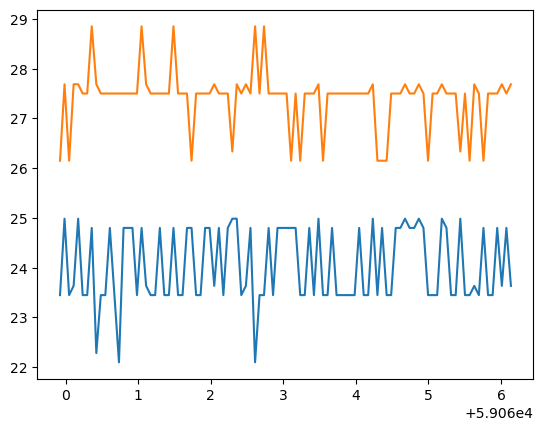

In [19]:
out = sim()
plt.plot(out['seconds'],out['T1'])
plt.plot(out['seconds'],out['T2'])

In [16]:
d.getCalibrationData()

{'lvSESlope': 3.7155114114284515e-05,
 'lvSEOffset': 0.006095356307923794,
 'lvDiffSlope': 7.450161501765251e-05,
 'lvDiffOffset': -2.4484216715209186,
 'dac0Slope': 50.459256483009085,
 'dac0Offset': -1.4224378280341625,
 'dac1Slope': 50.45663585397415,
 'dac1Offset': -1.1768596970941871,
 'tempSlope': 0.012794025707989931,
 'vRefAtCAl': 2.4479851357173175,
 'vRef1.5AtCal': 0.0,
 'vRegAtCal': 0.0,
 'hvAIN0Slope': 0.0003145120572298765,
 'hvAIN1Slope': 0.00031471624970436096,
 'hvAIN2Slope': 0.0003145120572298765,
 'hvAIN3Slope': 0.00031465827487409115,
 'hvAIN0Offset': -10.305149845778942,
 'hvAIN1Offset': -10.328868905315176,
 'hvAIN2Offset': -10.312163929920644,
 'hvAIN3Offset': -10.3208810063079}

### Use of a Graphical Users Interface with TKinter

In [23]:
import tkinter as tk
from matplotlib.figure import Figure 
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg,  
NavigationToolbar2Tk) 
  
# plot function is created for  
# plotting the graph in  
# tkinter window 
def plot(): 
  
    # the figure that will contain the plot 
    fig = Figure(figsize = (5, 5), 
                 dpi = 100) 
    #get data
    out = sim() 
    y1 = out['T1']; y2=out['T2']
    x = out['seconds']
  
    # adding the subplot 
    plot1 = fig.add_subplot(111) 
  
    # plotting the graph 
    plot1.plot(x,y1)
    plot1.plot(x,y2)
    plot1.set(xlabel='time, seconds', ylabel='temp, C')
  
    # creating the Tkinter canvas 
    # containing the Matplotlib figure 
    canvas = FigureCanvasTkAgg(fig, 
                               master = window)   
    canvas.draw() 
  
    # placing the canvas on the Tkinter window 
    canvas.get_tk_widget().pack() 
  
    # creating the Matplotlib toolbar 
    toolbar = NavigationToolbar2Tk(canvas, 
                                   window) 
    toolbar.update() 
  
    # placing the toolbar on the Tkinter window 
    canvas.get_tk_widget().pack() 
  
# the main Tkinter window 
window = tk.Tk() 
  
# setting the title  
window.title('Plotting in Tkinter') 
  
# dimensions of the main window 
window.geometry("500x500") 
  
# button that displays the plot 
plot_button = tk.Button(master = window,  
                     command = plot, 
                     height = 2,  
                     width = 10, 
                     text = "Plot") 
  
# place the button  
# in main window 
plot_button.pack() 
  
# run the gui 
window.mainloop()